<a href="https://colab.research.google.com/github/hublun/TWSApi/blob/master/Copy_of_IBApi_Historical_Data_Visualizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_pickle('/content/drive/MyDrive/TWS/M2K_20201115_to_20201120163500.pkl')

In [20]:
df["Time"] = pd.to_datetime(df["time"], format='%Y%m%d  %H:%M:%S', yearfirst=True)

In [21]:
df.drop('time', axis=1, inplace=True)

In [22]:
df["Hour"] = pd.DatetimeIndex(df["Time"]).hour
df["Minute"] = pd.DatetimeIndex(df["Time"]).minute
df["Second"] = pd.DatetimeIndex(df["Time"]).second
df["Day"] = pd.DatetimeIndex(df["Time"]).day

In [23]:
initialDateTime = df.Time[0]
initialDateTime

Timestamp('2020-11-15 18:00:00')

In [24]:
df["TradeDay"] = pd.TimedeltaIndex(df.Time - initialDateTime).days

In [25]:
df.head()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay
0,1747.9,1750.0,1745.0,1745.9,1747.97,44,2020-11-15 18:00:00,18,0,0,15,0
1,1748.8,1749.5,1748.8,1749.2,1749.17,3,2020-11-15 18:00:05,18,0,5,15,0
2,1749.1,1749.1,1747.2,1747.2,1748.68,18,2020-11-15 18:00:10,18,0,10,15,0
3,1748.5,1748.9,1748.5,1748.9,1748.63,3,2020-11-15 18:00:15,18,0,15,15,0
4,1749.0,1749.5,1748.6,1749.5,1749.23,9,2020-11-15 18:00:20,18,0,20,15,0


In [26]:
df["mu10min"] = df.avg.rolling(window=120, min_periods=1).mean()

df["mu5min"] = df.avg.rolling(window=60, min_periods=1).mean()
df["mu2min"] = df.avg.rolling(window=24, min_periods=1).mean()
df["mumin"] = df.avg.rolling(window=12, min_periods=1).mean()
df["dev"] = df.close - df.open

df["delta1m"] = df.avg - df.mumin
df["delta2m"] = df.avg - df.mu2min

df["delta5m"] = df.avg - df.mu5min
df["delta10m"] = df.avg - df.mu10min
 

In [27]:
df.head()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,mu10min,mu5min,mu2min,mumin,dev,delta1m,delta2m,delta5m,delta10m
0,1747.9,1750.0,1745.0,1745.9,1747.97,44,2020-11-15 18:00:00,18,0,0,15,0,1747.970000,1747.970000,1747.970000,1747.970000,-2.0,0.000000,0.000000,0.000000,0.000000
1,1748.8,1749.5,1748.8,1749.2,1749.17,3,2020-11-15 18:00:05,18,0,5,15,0,1748.570000,1748.570000,1748.570000,1748.570000,0.4,0.600000,0.600000,0.600000,0.600000
2,1749.1,1749.1,1747.2,1747.2,1748.68,18,2020-11-15 18:00:10,18,0,10,15,0,1748.606667,1748.606667,1748.606667,1748.606667,-1.9,0.073333,0.073333,0.073333,0.073333
3,1748.5,1748.9,1748.5,1748.9,1748.63,3,2020-11-15 18:00:15,18,0,15,15,0,1748.612500,1748.612500,1748.612500,1748.612500,0.4,0.017500,0.017500,0.017500,0.017500
4,1749.0,1749.5,1748.6,1749.5,1749.23,9,2020-11-15 18:00:20,18,0,20,15,0,1748.736000,1748.736000,1748.736000,1748.736000,0.5,0.494000,0.494000,0.494000,0.494000


In [28]:
df["pb30sec"] = (df.avg - df.avg.shift(periods=6)).fillna(0.0)
df["pbmin"] = (df.avg - df.avg.shift(periods=12)).fillna(0.0)
df["pb5min"] = (df.avg - df.avg.shift(periods=5*12)).fillna(0.0)
df["pb10min"] = (df.avg - df.avg.shift(periods=10*12)).fillna(0.0)
df.head()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,mu10min,mu5min,mu2min,mumin,dev,delta1m,delta2m,delta5m,delta10m,pb30sec,pbmin,pb5min,pb10min
0,1747.9,1750.0,1745.0,1745.9,1747.97,44,2020-11-15 18:00:00,18,0,0,15,0,1747.970000,1747.970000,1747.970000,1747.970000,-2.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,1748.8,1749.5,1748.8,1749.2,1749.17,3,2020-11-15 18:00:05,18,0,5,15,0,1748.570000,1748.570000,1748.570000,1748.570000,0.4,0.600000,0.600000,0.600000,0.600000,0.0,0.0,0.0,0.0
2,1749.1,1749.1,1747.2,1747.2,1748.68,18,2020-11-15 18:00:10,18,0,10,15,0,1748.606667,1748.606667,1748.606667,1748.606667,-1.9,0.073333,0.073333,0.073333,0.073333,0.0,0.0,0.0,0.0
3,1748.5,1748.9,1748.5,1748.9,1748.63,3,2020-11-15 18:00:15,18,0,15,15,0,1748.612500,1748.612500,1748.612500,1748.612500,0.4,0.017500,0.017500,0.017500,0.017500,0.0,0.0,0.0,0.0
4,1749.0,1749.5,1748.6,1749.5,1749.23,9,2020-11-15 18:00:20,18,0,20,15,0,1748.736000,1748.736000,1748.736000,1748.736000,0.5,0.494000,0.494000,0.494000,0.494000,0.0,0.0,0.0,0.0


In [29]:
df["pf10sec"] = (df.avg.shift(-2)-df.avg).fillna(0.0)
df["pf30sec"] = (df.avg.shift(-6)-df.avg).fillna(0.0)
df["pfmin"] = (df.avg.shift(-12)-df.avg).fillna(0.0)
df["pf2min"] = (df.avg.shift(-2*12)-df.avg).fillna(0.0)
df["pf5min"] = (df.avg.shift(-5*12)-df.avg).fillna(0.0)
df.tail()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,mu10min,mu5min,mu2min,mumin,dev,delta1m,delta2m,delta5m,delta10m,pb30sec,pbmin,pb5min,pb10min,pf10sec,pf30sec,pfmin,pf2min,pf5min
81595,1779.6,1779.6,1779.6,1779.6,1779.60,0,2020-11-20 16:34:35,16,34,35,20,4,1779.836833,1779.323167,1779.475417,1779.544167,0.0,0.055833,0.124583,0.276833,-0.236833,0.25,-0.45,0.75,-3.02,-0.52,0.0,0.0,0.0,0.0
81596,1779.4,1779.4,1779.4,1779.4,1779.40,1,2020-11-20 16:34:40,16,34,40,20,4,1779.809583,1779.334000,1779.467083,1779.541667,0.0,-0.141667,-0.067083,0.066000,-0.409583,0.00,-0.03,0.65,-3.27,-0.50,0.0,0.0,0.0,0.0
81597,1779.4,1779.4,1778.9,1778.9,1779.08,4,2020-11-20 16:34:45,16,34,45,20,4,1779.780250,1779.343667,1779.459167,1779.490000,-0.5,-0.410000,-0.379167,-0.263667,-0.700250,-0.32,-0.62,0.58,-3.52,-0.43,0.0,0.0,0.0,0.0
81598,1778.9,1778.9,1778.9,1778.9,1778.90,0,2020-11-20 16:34:50,16,34,50,20,4,1779.751833,1779.343167,1779.442500,1779.431667,0.0,-0.531667,-0.542500,-0.443167,-0.851833,-0.80,-0.70,-0.03,-3.41,0.00,0.0,0.0,0.0,0.0
81599,1778.7,1778.7,1778.6,1778.6,1778.65,8,2020-11-20 16:34:55,16,34,55,20,4,1779.722250,1779.327500,1779.411250,1779.348333,-0.1,-0.698333,-0.761250,-0.677500,-1.072250,-0.95,-1.00,-0.94,-3.55,0.00,0.0,0.0,0.0,0.0


In [30]:
df.columns[16:30]

Index(['dev', 'delta1m', 'delta2m', 'delta5m', 'delta10m', 'pb30sec', 'pbmin',
       'pb5min', 'pb10min', 'pf10sec', 'pf30sec', 'pfmin', 'pf2min', 'pf5min'],
      dtype='object')

In [31]:
df.drop(df.head(10*12).index, inplace=True)
df.drop(df.tail(5*12).index, inplace=True)

In [32]:
df.shape

(81420, 30)

In [33]:
df.columns[16:30]

Index(['dev', 'delta1m', 'delta2m', 'delta5m', 'delta10m', 'pb30sec', 'pbmin',
       'pb5min', 'pb10min', 'pf10sec', 'pf30sec', 'pfmin', 'pf2min', 'pf5min'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


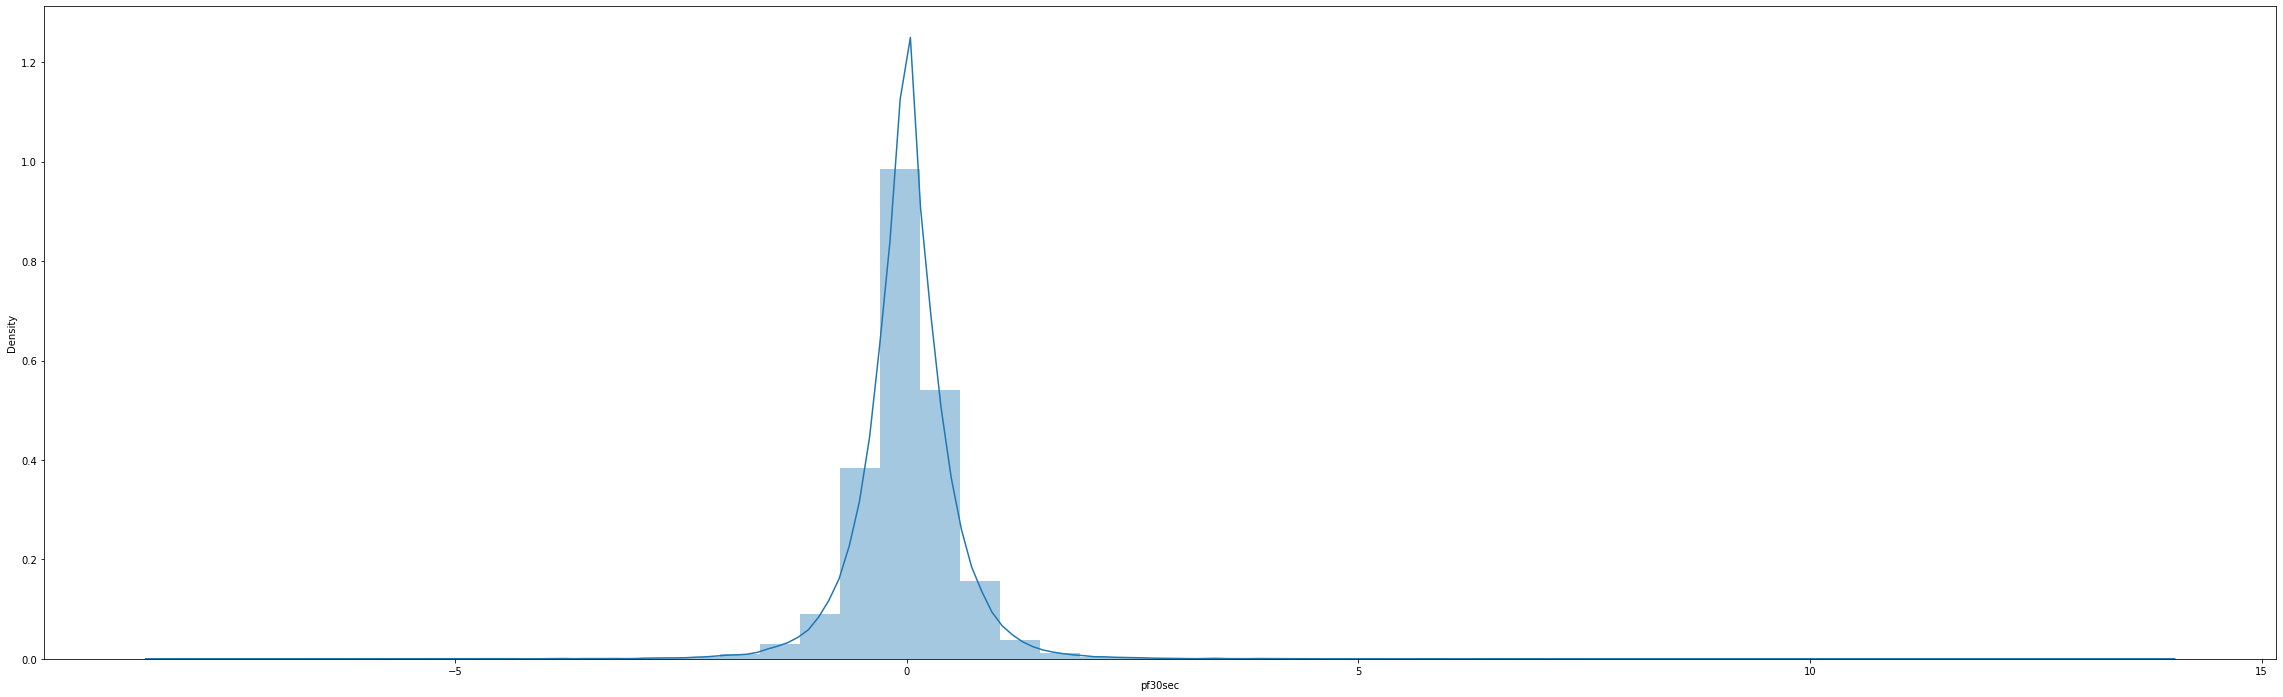

In [63]:
a4_dims = (40,12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(df.pf30sec)

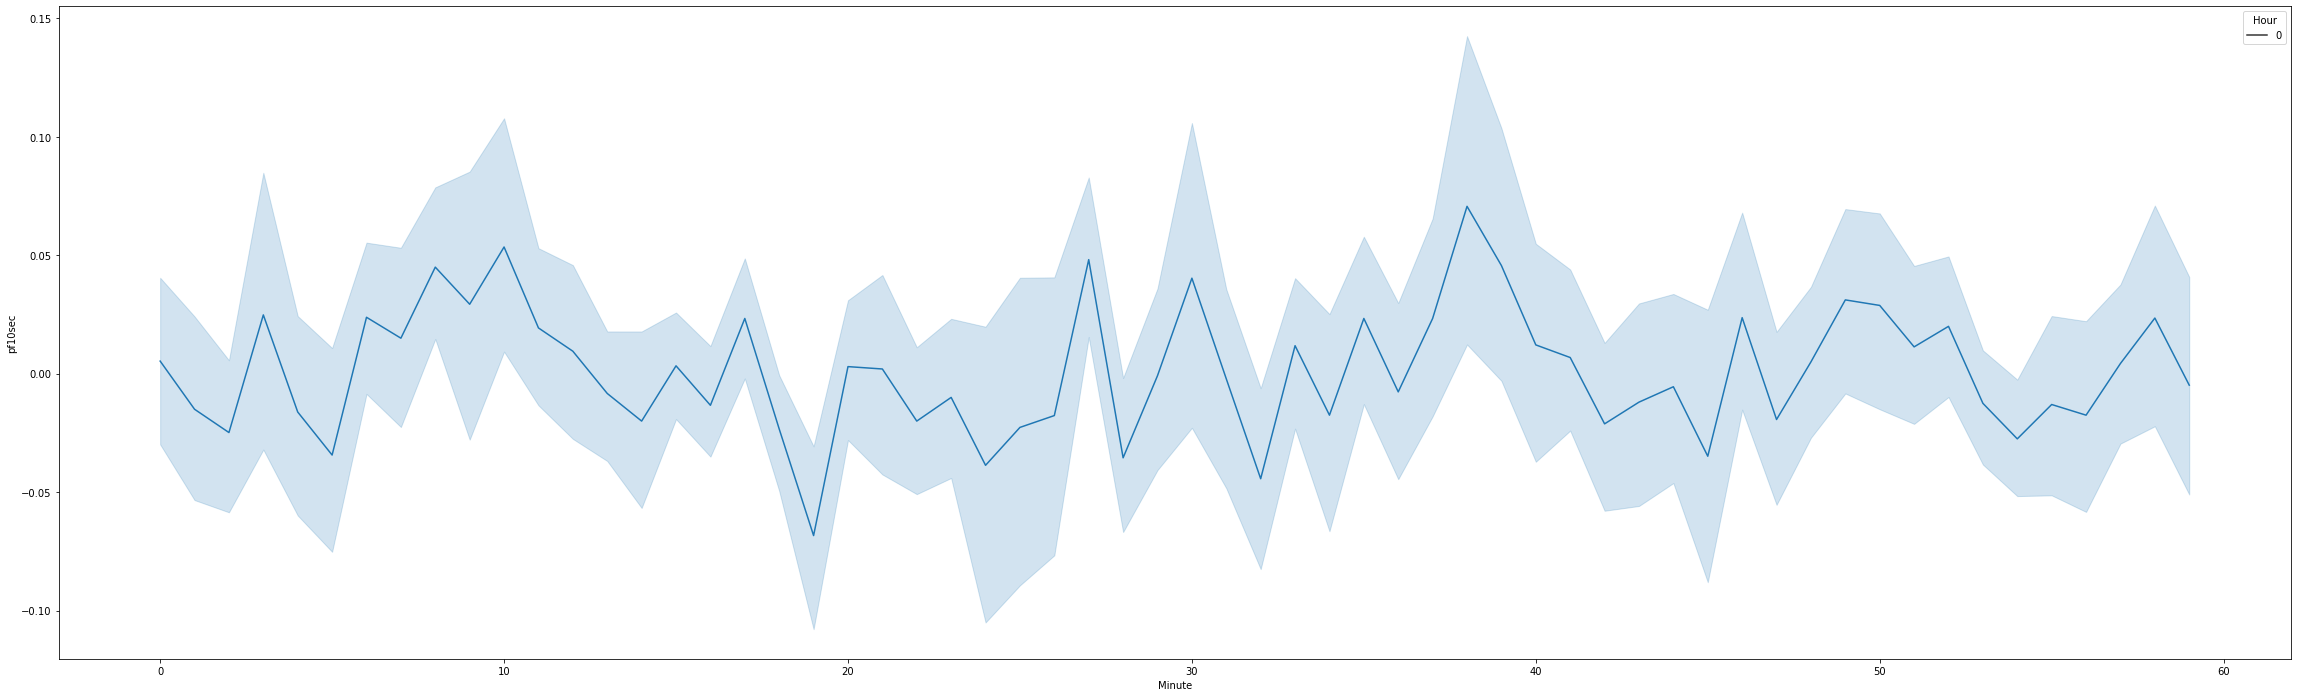

In [64]:
data=df[df.Hour==0]
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x=data.Minute, y=data.pf10sec, style=data.Hour)

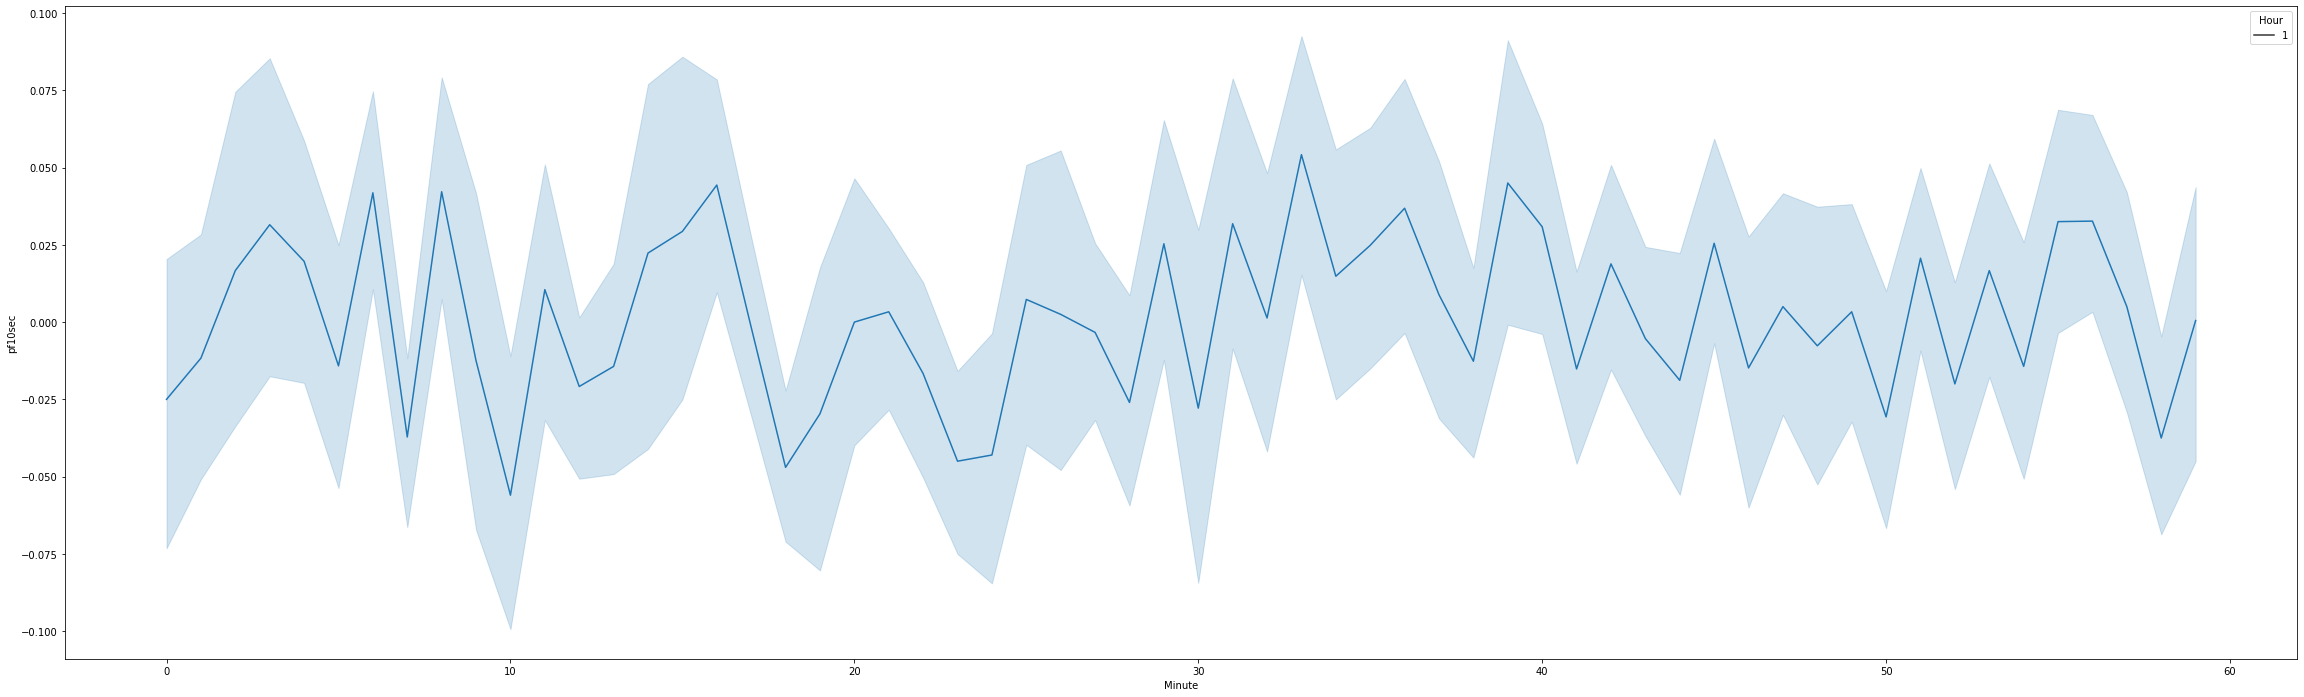

In [65]:
data=df[df.Hour==1]
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x=data.Minute, y=data.pf10sec, style=data.Hour)

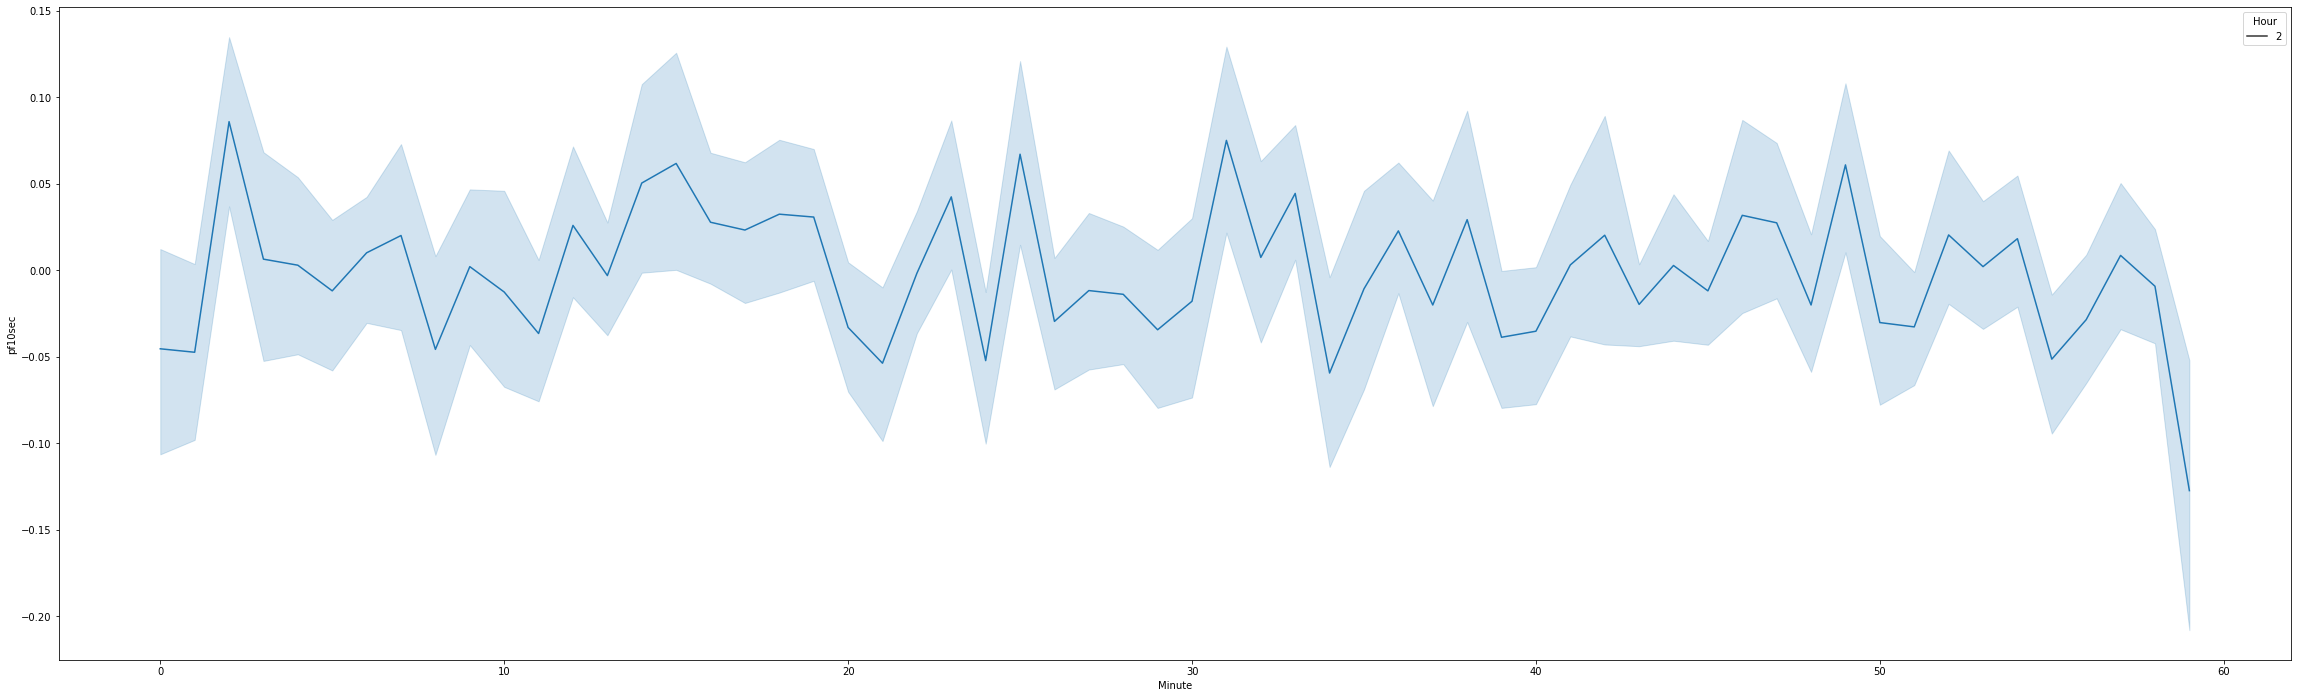

In [66]:
data=df[df.Hour==2]
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x=data.Minute, y=data.pf10sec, style=data.Hour)

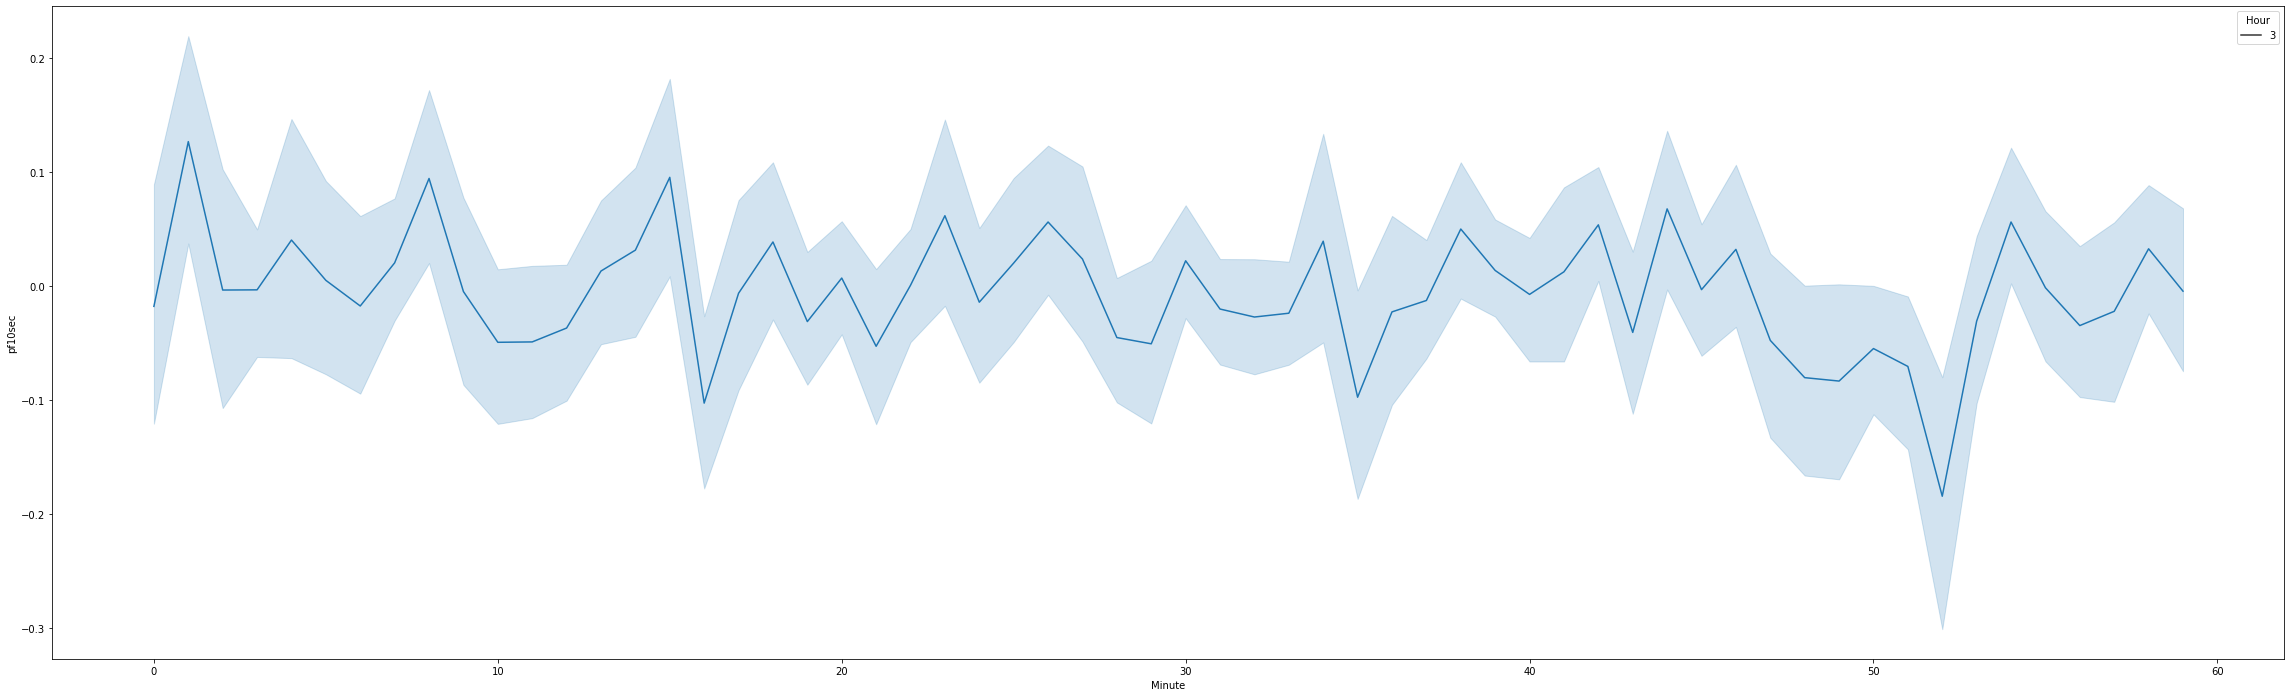

In [67]:
data=df[df.Hour==3]
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x=data.Minute, y=data.pf10sec, style=data.Hour)

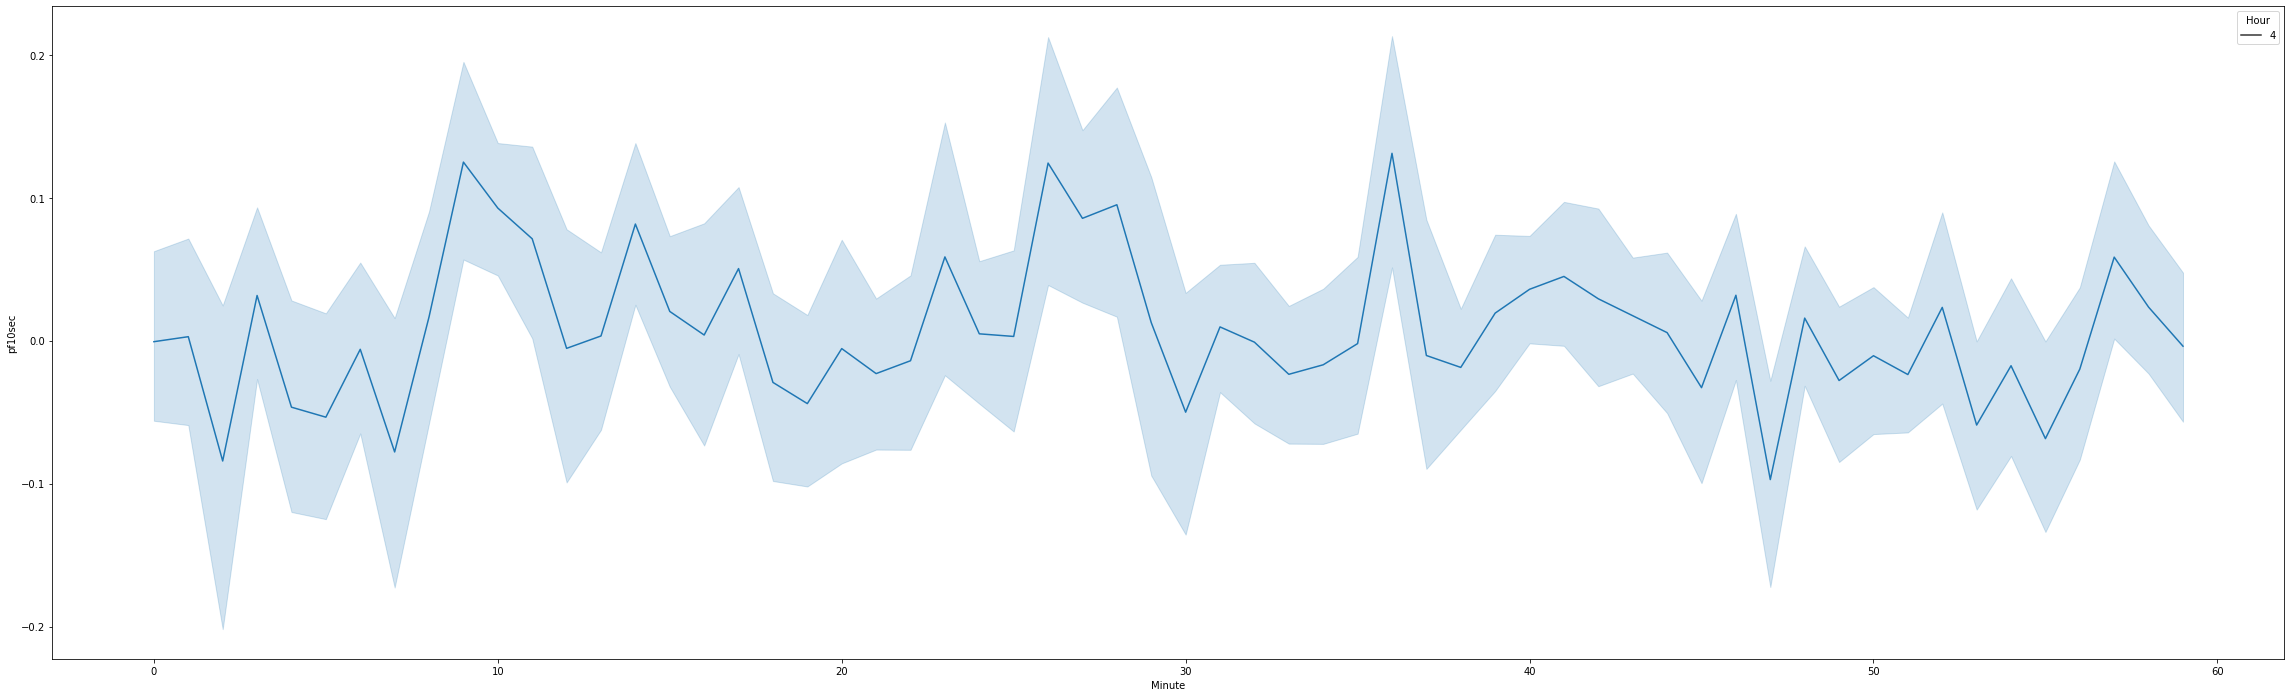

In [68]:
data=df[df.Hour==4]
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x=data.Minute, y=data.pf10sec, style=data.Hour)